<a href="https://colab.research.google.com/github/Afnaan-Alqadree/ai-ml-projects/blob/main/SimilarityMatric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    gpa  studyweek  sleepnight  out  gender
0  3.89         50         6.0  3.0  female
1  3.90         15         6.0  1.0  female
2  3.75         15         7.0  1.0  female
3  3.60         10         6.0  4.0    male
4  4.00         25         7.0  3.0  female


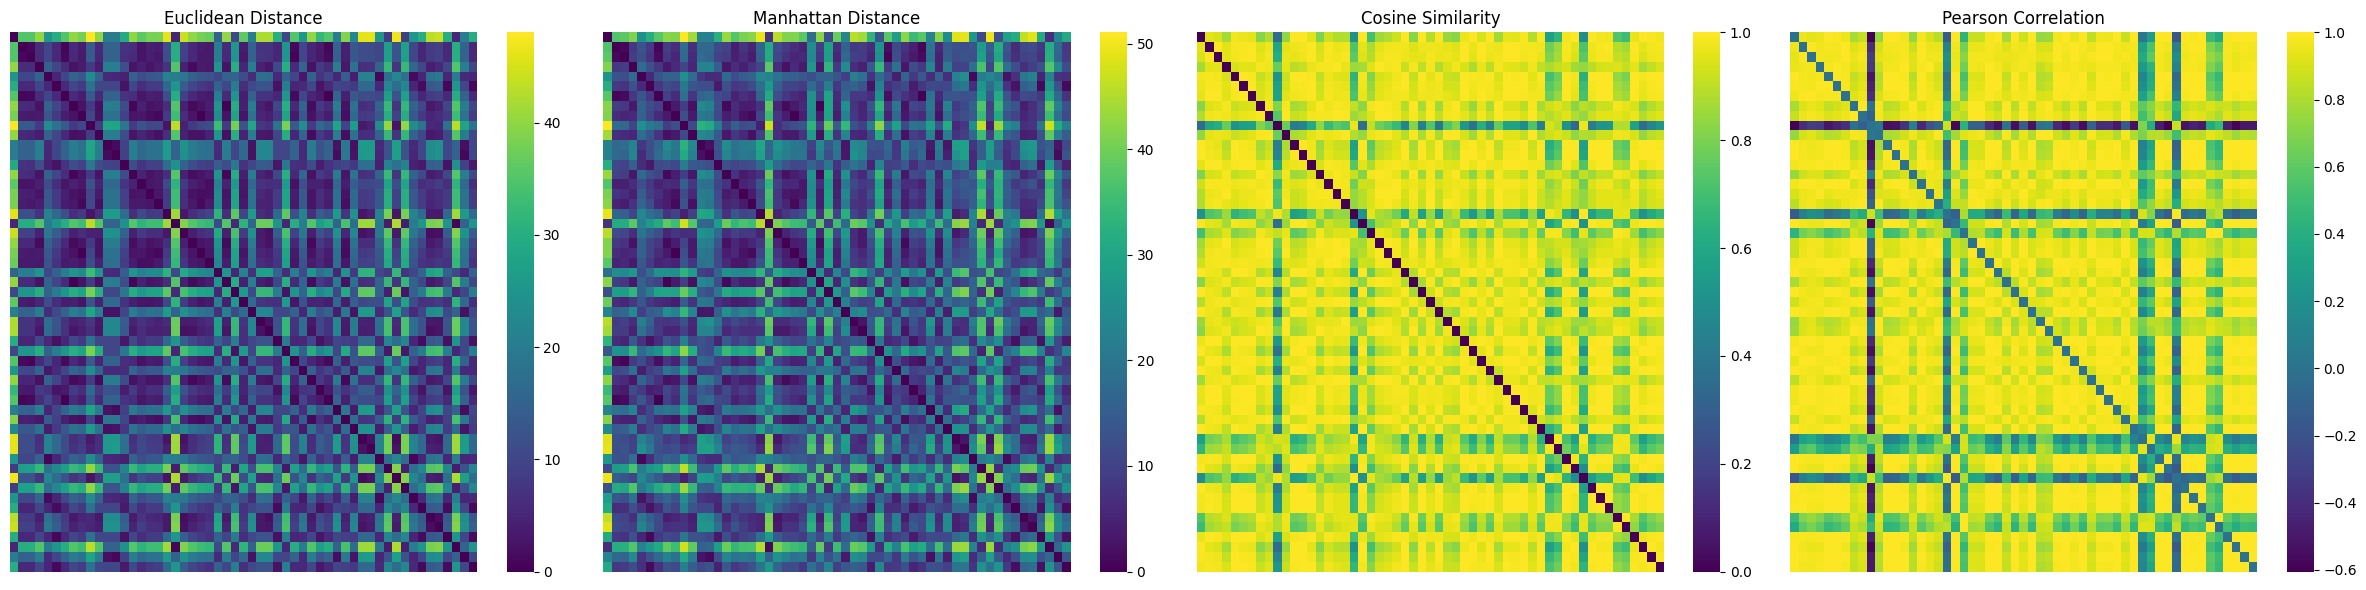

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/gpa.csv')

# Display the first few rows
print(data.head())

# Select numerical columns for similarity calculations
numerical_columns = ['gpa', 'studyweek', 'sleepnight', 'out']
numerical_data = data[numerical_columns].values

# Initialize the similarity matrices
n = len(data)
euclidean_similarities = np.zeros((n, n))
manhattan_distances = np.zeros((n, n))
cosine_similarities = np.zeros((n, n))
pearson_correlations = np.zeros((n, n))


# Calculate similarity measures
for i in range(n):
    for j in range(i + 1, n):
        p1 = numerical_data[i]
        p2 = numerical_data[j]

        # Calculate Euclidean distance
        euclidean_similarities[i][j] = distance.euclidean(p1, p2)
        euclidean_similarities[j][i] = euclidean_similarities[i][j]

        # Calculate Manhattan distance
        manhattan_distances[i][j] = distance.cityblock(p1, p2)
        manhattan_distances[j][i] = manhattan_distances[i][j]

        # Calculate cosine similarity
        cosine_similarities[i][j] = 1 - distance.cosine(p1, p2)
        cosine_similarities[j][i] = cosine_similarities[i][j]

         # Calculate Pearson correlation
        pearson_correlations[i][j] = np.corrcoef(p1, p2)[0, 1]
        pearson_correlations[j][i] = pearson_correlations[i][j]

# Generate heatmaps
similarities_list = [euclidean_similarities, manhattan_distances, cosine_similarities,pearson_correlations]
titles = ['Euclidean Distance', 'Manhattan Distance', 'Cosine Similarity','Pearson Correlation']

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for idx, (similarity, title) in enumerate(zip(similarities_list, titles)):
    sns.heatmap(similarity, xticklabels=False, yticklabels=False, ax=axes[idx], cmap='viridis')
    axes[idx].set_title(title)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[2.18640193e-14 2.25787451e-07 4.83710734e-05]
not reaching the requested tolerance 8.195638656616211e-07.
Use iteration 1308 instead with accuracy 
5.8751671505642295e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.27484945e-14 2.76643646e-07 1.73488577e-05]
not reaching the requested tolerance 8.195638656616211e-07.
  _, diffusion_map = lobpcg(


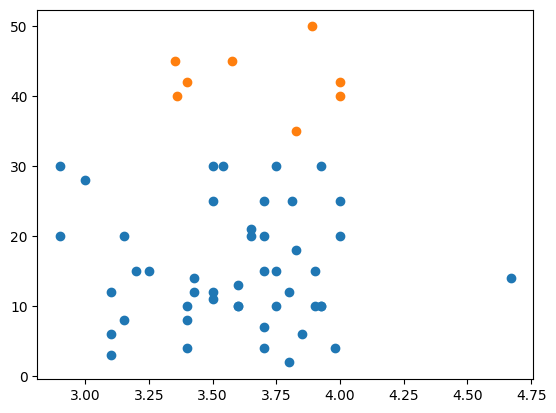

In [ ]:
import pandas as pd
from numpy import unique, where
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot

your_data = pd.read_csv('/gpa.csv')


X = your_data.iloc[:, :4].values

# Step 3: Define the SpectralClustering model
model = SpectralClustering(n_clusters=2)  # Change n_clusters if needed

# Step 4: Fit the model and predict clusters
yhat = model.fit_predict(X)

# Step 5: Retrieve unique clusters
clusters = unique(yhat)

# Step 6: Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # Create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# Step 7: Show the plot
pyplot.show()


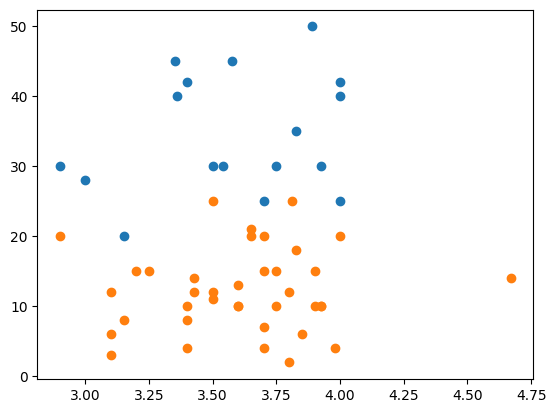

In [ ]:
import pandas as pd
from numpy import unique, where
from sklearn.cluster import OPTICS
from matplotlib import pyplot

# Step 1: Load your dataset from a CSV file
# Replace 'your_data.csv' with the actual path to your file
your_data = pd.read_csv('/gpa.csv')

X = your_data.iloc[:, :4].values  # or choose specific columns like your_data[['feature1', 'feature2']]

# Step 3: Define the OPTICS model
model = OPTICS(eps=0.8, min_samples=10)

# Step 4: Fit the model and predict clusters
yhat = model.fit_predict(X)

# Step 5: Retrieve unique clusters
clusters = unique(yhat)

# Step 6: Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # Create scatter plot of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# Step 7: Show the plot
pyplot.show()
